# Create Decision Tree Classifier and visualize it graphically

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('datasets_IRIS.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

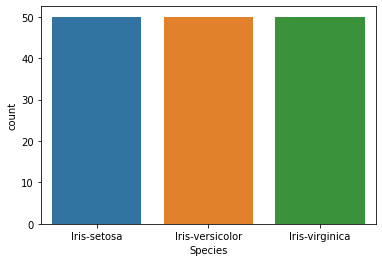

In [7]:
sns.countplot(df['Species'],label="count")

In [8]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y=LabelEncoder()
df.iloc[ : ,5]=labelencoder_Y.fit_transform(df.iloc[ : ,5].values)

In [12]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,1,0
1,2,4.9,3.0,1.4,1,0
2,3,4.7,3.2,1.3,1,0
3,4,4.6,3.1,1.5,1,0
4,5,5.0,3.6,1.4,1,0


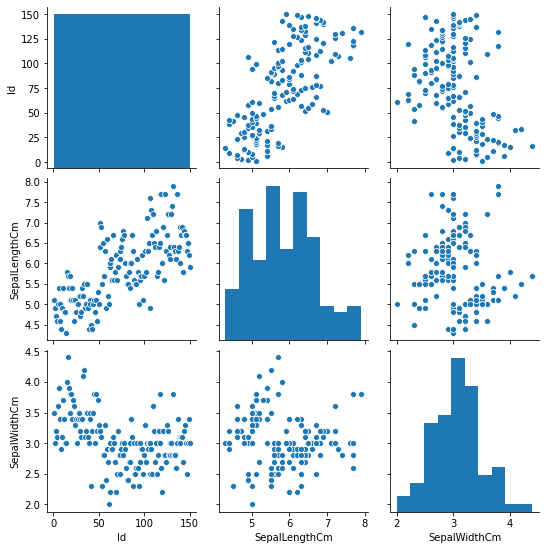

In [13]:
sns.pairplot(df.iloc[ : ,0:3])

In [14]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.716676,-0.397729,0.882747,0.891079,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.815570,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.292843,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.942615,0.949043
PetalWidthCm,0.891079,0.815570,-0.292843,0.942615,1.000000,0.947668
Species,0.942830,0.782561,-0.419446,0.949043,0.947668,1.000000


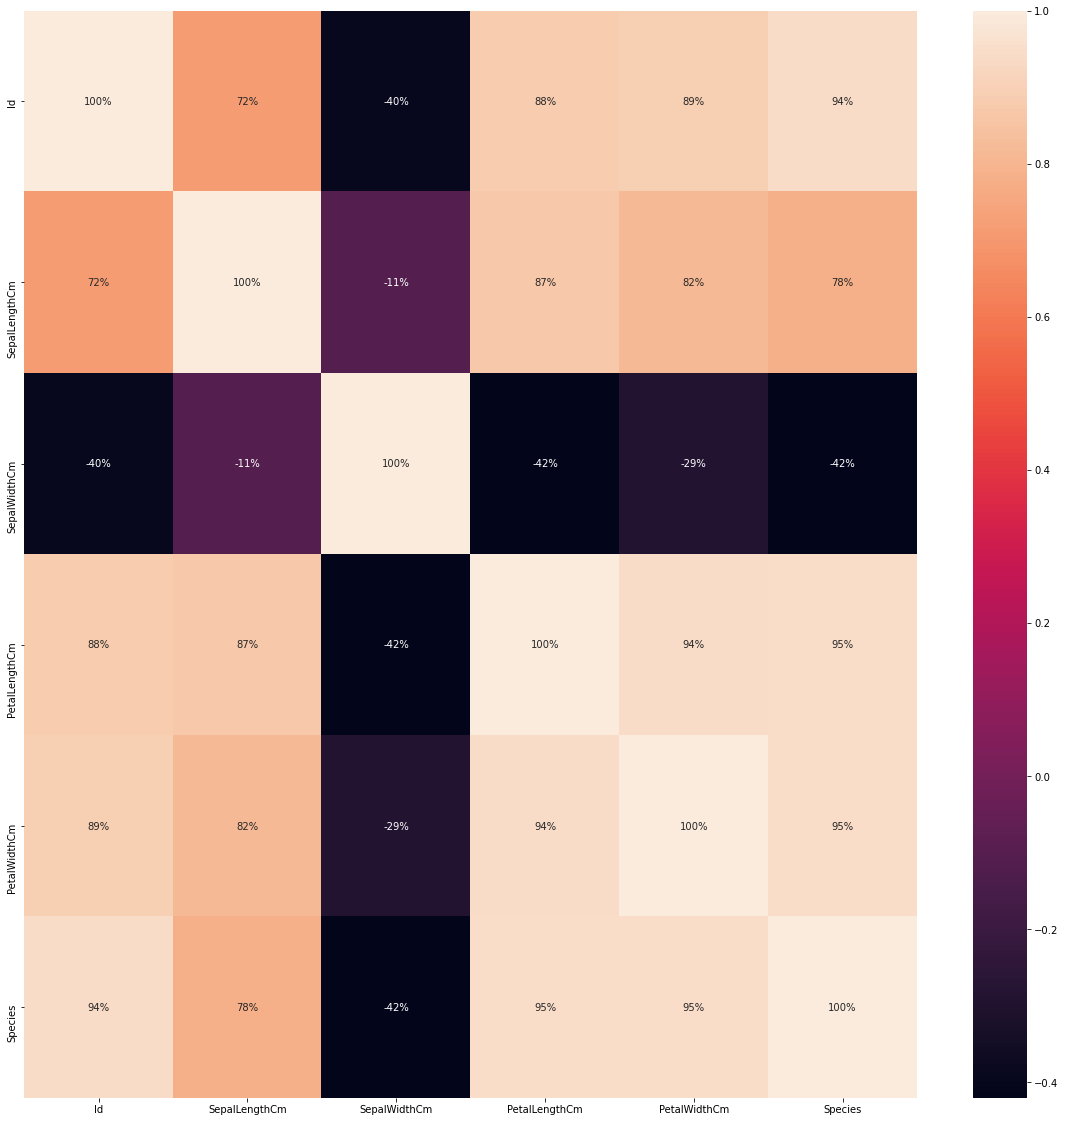

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [17]:
X=df.iloc[ : ,1:4].values
print(X)

[[5.1 3.5 1.4]
 [4.9 3.  1.4]
 [4.7 3.2 1.3]
 [4.6 3.1 1.5]
 [5.  3.6 1.4]
 [5.4 3.9 1.7]
 [4.6 3.4 1.4]
 [5.  3.4 1.5]
 [4.4 2.9 1.4]
 [4.9 3.1 1.5]
 [5.4 3.7 1.5]
 [4.8 3.4 1.6]
 [4.8 3.  1.4]
 [4.3 3.  1.1]
 [5.8 4.  1.2]
 [5.7 4.4 1.5]
 [5.4 3.9 1.3]
 [5.1 3.5 1.4]
 [5.7 3.8 1.7]
 [5.1 3.8 1.5]
 [5.4 3.4 1.7]
 [5.1 3.7 1.5]
 [4.6 3.6 1. ]
 [5.1 3.3 1.7]
 [4.8 3.4 1.9]
 [5.  3.  1.6]
 [5.  3.4 1.6]
 [5.2 3.5 1.5]
 [5.2 3.4 1.4]
 [4.7 3.2 1.6]
 [4.8 3.1 1.6]
 [5.4 3.4 1.5]
 [5.2 4.1 1.5]
 [5.5 4.2 1.4]
 [4.9 3.1 1.5]
 [5.  3.2 1.2]
 [5.5 3.5 1.3]
 [4.9 3.1 1.5]
 [4.4 3.  1.3]
 [5.1 3.4 1.5]
 [5.  3.5 1.3]
 [4.5 2.3 1.3]
 [4.4 3.2 1.3]
 [5.  3.5 1.6]
 [5.1 3.8 1.9]
 [4.8 3.  1.4]
 [5.1 3.8 1.6]
 [4.6 3.2 1.4]
 [5.3 3.7 1.5]
 [5.  3.3 1.4]
 [7.  3.2 4.7]
 [6.4 3.2 4.5]
 [6.9 3.1 4.9]
 [5.5 2.3 4. ]
 [6.5 2.8 4.6]
 [5.7 2.8 4.5]
 [6.3 3.3 4.7]
 [4.9 2.4 3.3]
 [6.6 2.9 4.6]
 [5.2 2.7 3.9]
 [5.  2.  3.5]
 [5.9 3.  4.2]
 [6.  2.2 4. ]
 [6.1 2.9 4.7]
 [5.6 2.9 3.6]
 [6.7 3.1 4.4]
 [5.6 3.  

In [18]:
Y=df.iloc[ : ,5].values
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [20]:
sc= StandardScaler()
X_train =sc.fit_transform(X_train)
X_test =sc.fit_transform(X_test)

In [21]:
#Create a function for the models
def models(X_train,Y_train):
  
  #Using Logistic Regression 
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)
  
  #Using KNeighborsClassifier 
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(X_train, Y_train)

  #Using SVC linear
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(X_train, Y_train)

  #Using SVC rbf
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB 
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier 
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, Y_train)

 #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, Y_train)
  
  #print model accuracy on the training data.
    print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
    print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
    print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
    print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
    print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
    print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
    print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [22]:
#Getting all of the models
model = models(X_train,Y_train)

[0]Logistic Regression Training Accuracy: 0.9553571428571429
[1]K Nearest Neighbor Training Accuracy: 0.9375
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.9732142857142857
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.9553571428571429
[4]Gaussian Naive Bayes Training Accuracy: 0.9196428571428571
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.9732142857142857


In [23]:
#test model accuracy on test data on confusion matrix
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
  cm = confusion_matrix(Y_test, model[i].predict(X_test))
  
  TN = cm[0][0]
  TP = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]
  
  print(cm)
  print('Model[{}] Testing Accuracy = "{}!"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
  print()# Print a new line

[[13  0  0]
 [ 0 11  5]
 [ 0  0  9]]
Model[0] Testing Accuracy = "1.0!"

[[13  0  0]
 [ 0 11  5]
 [ 0  0  9]]
Model[1] Testing Accuracy = "1.0!"

[[13  0  0]
 [ 0  9  7]
 [ 0  0  9]]
Model[2] Testing Accuracy = "1.0!"

[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
Model[3] Testing Accuracy = "1.0!"

[[13  0  0]
 [ 0  9  7]
 [ 0  0  9]]
Model[4] Testing Accuracy = "1.0!"

[[13  0  0]
 [ 0  9  7]
 [ 0  1  8]]
Model[5] Testing Accuracy = "1.0!"

[[13  0  0]
 [ 0 12  4]
 [ 0  0  9]]
Model[6] Testing Accuracy = "1.0!"



In [25]:
#Print Prediction of Random Forest Classifier model
pred = model[6].predict(X_test)
print(pred)

#Print a space
print()

#Print the actual values
print(Y_test)

[2 1 0 2 0 2 0 1 2 1 2 1 2 1 2 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]


# THANK YOU